In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image as Show

ImportError: cannot import name 'bigpycraft_bda'

In [4]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [8]:
from konlpy.corpus import kobill
from konlpy.tag    import Twitter
from wordcloud     import WordCloud, STOPWORDS
from PIL import Image

import nltk

In [9]:
# 육아휴직관련 법안
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [32]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [11]:
type(doc_ko), len(doc_ko)

(str, 4201)

In [12]:
twitter = Twitter()

tokens_ko = twitter.nouns(doc_ko)
len(tokens_ko), tokens_ko[:10]

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


(735, ['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의'])

In [33]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [14]:
print("token length :", len(ko.tokens))             # returns number of tokens (document length)
print("unique token :", len(set(ko.tokens)))        # returns number of unique tokens

token length : 735
unique token : 250


In [15]:
# frequency distribution
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

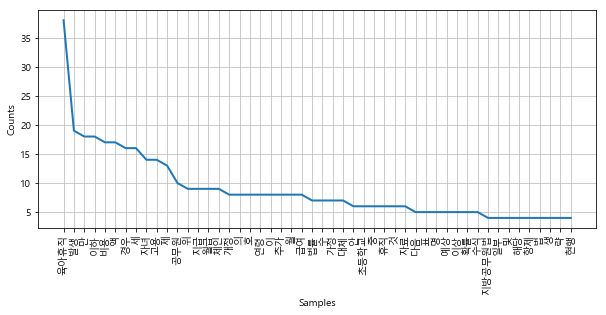

In [16]:
plt.figure(figsize=(10,4))
ko.plot(50)
plt.show()

In [29]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]

len(ko), ko[:10]

(681, ['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일'])

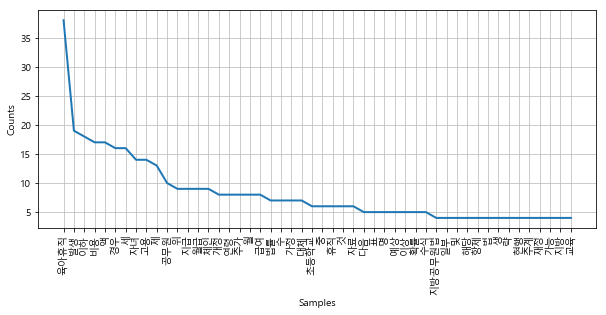

In [18]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(10,4))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [19]:
ko.count('초등학교')

6

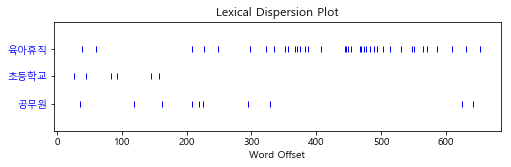

In [20]:
# 단어의 분포를 보여주는 플롯그래프 
plt.figure(figsize=(8,2))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [34]:
# 대소문자 상관없이 일치단어 찾기
ko.concordance('초등학교')

Displaying 6 of 6 matches:
규 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴
나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것
 법률 안 지방공무원법 일부 다음 개정 제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 
중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 의 자녀 로 부 칙 이 법 공포 날 시행 신 구조 문
 제 호 의 경우 대통령령 정 사정 직 명 생 략 현행 만 세 이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년
이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 의 자녀 임신 출산 때 생 략 생 략


In [37]:
# import nltk
# nltk.download('stopwords')
# 요게 있어야 collocations 사용 되네

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ente_LJS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [38]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


In [39]:
ko.collocations(num=5, window_size=3)

초등학교 저학년; 육아휴직 대상자; 공무원 근로자; 고용노동부 육아휴직; 근로자 육아휴직
